# PROJET MACHINE LEARNING

The Social Media Sentiments Analysis Dataset capture une riche tapisserie d'émotions, de tendances et d'interactions à travers diverses plateformes de réseaux sociaux. Ce dataset offre un instantané du contenu généré par les utilisateurs, fournissant des insights précieux sur les émotions collectives, les comportements et les engagements des utilisateurs du monde entier. Chaque entrée dans le dataset raconte une histoire unique—qu'il s'agisse de moments de surprise, d'excitation, d'admiration, de frisson, de contentement ou d'autres émotions—partagées par des individus à travers diverses géographies.

Projet Flask pour l'analyse des sentiments des tweets basés sur des hashtags et des réseaux sociaux

## Metadonnées

In [51]:
import pandas as pd

# Définir les métadonnées
metadata = {
    "Feature": [
        "Text", "Sentiment", "Timestamp", "User",
        "Platform", "Hashtags", "Likes", "Retweets",
        "Country", "Year", "Month", "Day", "Hour"
    ],
    "Description": [
        "User-generated content showcasing sentiments.",
        "Categorized emotions, such as positive, negative, or neutral.",
        "Date and time information marking when the content was posted.",
        "Unique identifiers of users contributing to the dataset.",
        "Social media platform where the content originated.",
        "Keywords or phrases preceded by a hash sign (#), used to identify topics and trends.",
        "Number of likes received, quantifying user engagement.",
        "Number of retweets or shares, reflecting the popularity and reach of the content.",
        "Geographical origin of each post.",
        "The year when the post was made.",
        "The month of the post.",
        "The specific day the post was made.",
        "The hour of the post."
    ]
}

# Créer un DataFrame à partir des métadonnées
metadata_df = pd.DataFrame(metadata)

# Afficher le DataFrame
metadata_df


,Feature,Description
0,Text,User-generated content showcasing sentiments.
1,Sentiment,"Categorized emotions, such as positive, negati..."
2,Timestamp,Date and time information marking when the con...
3,User,Unique identifiers of users contributing to th...
4,Platform,Social media platform where the content origin...
5,Hashtags,Keywords or phrases preceded by a hash sign (#...
6,Likes,"Number of likes received, quantifying user eng..."
7,Retweets,"Number of retweets or shares, reflecting the p..."
8,Country,Geographical origin of each post.
9,Year,The year when the post was made.


## Import des librairies nécessaires

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

!pip install vaderSentiment

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ingemedia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ingemedia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ingemedia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ingemedia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ingemedia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ingemedia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is alr

Defaulting to user installation because normal site-packages is not writeable


# DATA Import

In [53]:
import os
import pandas as pd

# Obtenez le répertoire de travail actuel
current_directory = os.getcwd()

# Construisez le chemin relatif vers le fichier CSV
file_name = 'sentimentdataset.csv'
file_path = os.path.join(current_directory, file_name)

# Lire le fichier CSV
data_base = pd.read_csv(file_path)

# DATA Management

## DATA Cleaning : Nettoyage et processing des données

In [54]:
data_base.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### Suppression des espaces

In [55]:
data_base['Text']= data_base['Text'].str.strip()
data_base['Sentiment']= data_base['Sentiment'].str.strip()
data_base['User']= data_base['User'].str.strip()
data_base['Platform']= data_base['Platform'].str.strip()
data_base['Hashtags']= data_base['Hashtags'].str.strip()
data_base['Country']= data_base['Country'].str.strip()

### Transformation

In [56]:
# Afficher le nombre de doublons
print(f"Nombre de doublons dans le DF : {data_base.duplicated().sum()}")

# Supprimer les doublons dans le DataFrame
print("Supression des doublons")
data_base = data_base.drop_duplicates()

# Supprimer les lignes avec des valeurs manquantes (si nécessaire)
print("Supression des lignes contenant des valeurs manquantes")
data_base.dropna(inplace=True)

# Supprimer les colonnes inutiles
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']
data_base.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

Nombre de doublons dans le DF : 0
Supression des doublons
Supression des lignes contenant des valeurs manquantes


In [57]:
# Convertir la colonne Timestamp en datetime
data_base['time'] = pd.to_datetime(data_base['Timestamp'])

# Séparation en colonnes Date et Time
data_base['Date'] = data_base['time'].dt.date
data_base['Time'] = data_base['time'].dt.time

# Extraction du jour de la semaine
data_base['Weekday'] = data_base['time'].dt.weekday #(6=Samedi)
data_base.head()

#: Suppression des colonnes originales
# data_processed.drop(['Timestamp', 'time'], axis=1, inplace=True)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,time,Date,Time,Weekday
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15 12:30:00,2023-01-15,12:30:00,6
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15 08:45:00,2023-01-15,08:45:00,6
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,2023-01-15 15:45:00,2023-01-15,15:45:00,6
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,2023-01-15 18:20:00,2023-01-15,18:20:00,6
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,2023-01-15 19:55:00,2023-01-15,19:55:00,6


In [58]:
from copy import deepcopy
## L'intérêt est d'avoir une copie des données dans un autre objet pour que cela soit totalement indépendant
def preprocess_dataset(data_base):
    # Copier le DataFrame avec deepcopy
    data = deepcopy(data_base)
    # Retourner la copie
    return data
data = preprocess_dataset(data_base)

## Observation des données

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    object        
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    float64       
 7   Likes      732 non-null    float64       
 8   Country    732 non-null    object        
 9   Year       732 non-null    int64         
 10  Month      732 non-null    int64         
 11  Day        732 non-null    int64         
 12  Hour       732 non-null    int64         
 13  time       732 non-null    datetime64[ns]
 14  Date       732 non-null    object        
 15  Time       732 non-null    object        
 16  Weekday    732 non-null    int32         
dt

In [60]:
data.shape

(732, 17)

In [61]:
data.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour', 'time',
       'Date', 'Time', 'Weekday'],
      dtype='object')

### Missing Values

In [62]:
missing_values = data.isnull().sum()
print(missing_values)

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
time         0
Date         0
Time         0
Weekday      0
dtype: int64


In [63]:
# Statistiques descriptives des valeurs numériques
data.describe()


,Retweets,Likes,Year,Month,Day,Hour,time,Weekday
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858,2020-12-08 21:37:38.196721408,3.131148
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000,2010-05-15 15:30:00,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000,2019-03-08 17:27:30,1.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000,2021-09-20 14:30:00,3.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000,2023-02-26 11:48:45,5.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000,2023-10-22 20:45:00,6.000000
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414,NaN,2.035059


In [64]:
# Statistiques descriptives des valeurs non-numériques
data.describe(include=['object'])

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country,Date,Time
count,732,732,732,732,732,732,732,732,732
unique,706,191,683,670,3,692,33,533,107
top,"A compassionate rain, tears of empathy falling...",Positive,2022-07-17 06:15:00,ForestDreamer,Instagram,#Playful #CarnivalEscapade,USA,2023-01-15,19:30:00
freq,3,45,3,3,258,3,188,6,30


In [65]:
data['Sentiment'].value_counts()

Sentiment
Positive          45
Joy               44
Excitement        37
Contentment       19
Neutral           18
                  ..
LostLove           1
EmotionalStorm     1
Suffering          1
Bittersweet        1
Intrigue           1
Name: count, Length: 191, dtype: int64

### Visualisation des 10 Sentiments avec le plus fort cumul

<Figure size 1000x600 with 0 Axes>

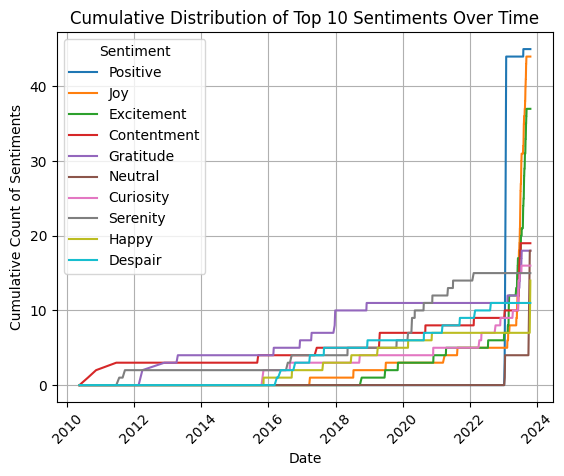

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la colonne Timestamp en format datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Grouper les données par sentiment et date, et compter les occurrences
sentiment_counts = data.groupby([data['Timestamp'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

# Sélectionner les 10 sentiments les plus fréquents
top_10_sentiments = sentiment_counts.sum().nlargest(10).index

# Filtrer les données pour ne garder que les 10 sentiments les plus importants
sentiment_counts_top_10 = sentiment_counts[top_10_sentiments]

# Calculer les sommes cumulées pour ces sentiments
sentiment_counts_top_10_cumulative = sentiment_counts_top_10.cumsum()

# Tracer la distribution des 10 sentiments cumulés
plt.figure(figsize=(10,6))
sentiment_counts_top_10_cumulative.plot(kind='line')
plt.title('Cumulative Distribution of Top 10 Sentiments Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Sentiments')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.grid(True)
plt.show()


### Visualisation des Sentiments neutre, positif et négatif avec le plus fort cumul

<Figure size 1000x600 with 0 Axes>

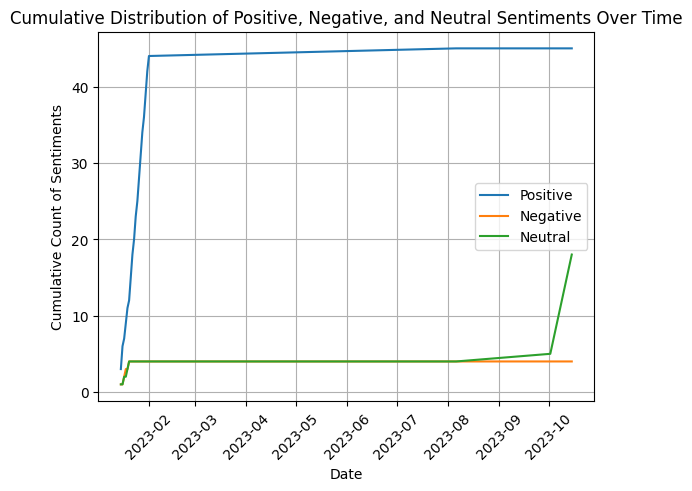

In [67]:
# Filtrer les données pour les sentiments positifs, négatifs et neutres
positive = data[data['Sentiment'] == "Positive"]
negative = data[data['Sentiment'] == "Negative"]
neutral = data[data['Sentiment'] == "Neutral"]

# Grouper les données par date et compter les sentiments
pos_counts = positive.groupby(positive['Timestamp'].dt.date).size()
neg_counts = negative.groupby(negative['Timestamp'].dt.date).size()
neu_counts = neutral.groupby(neutral['Timestamp'].dt.date).size()

# Créer un DataFrame combiné avec les trois séries
data_sent_base = pd.DataFrame({
    'Positive': pos_counts,
    'Negative': neg_counts,
    'Neutral': neu_counts
})

# Remplacer les valeurs NaN par des zéros
data_sent_base = data_sent_base.fillna(0)

# Calculer les sommes cumulées
data_sent_base_cumulative = data_sent_base.cumsum()

# Tracer la distribution des sentiments cumulés pour positif, négatif et neutre
plt.figure(figsize=(10,6))
data_sent_base_cumulative.plot(kind='line')
plt.title('Cumulative Distribution of Positive, Negative, and Neutral Sentiments Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Sentiments')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.grid(True)
plt.show()


### Visualisation des 10 Sentiments avec le plus fort cumul pour chaque plateforme

<Figure size 1000x600 with 0 Axes>

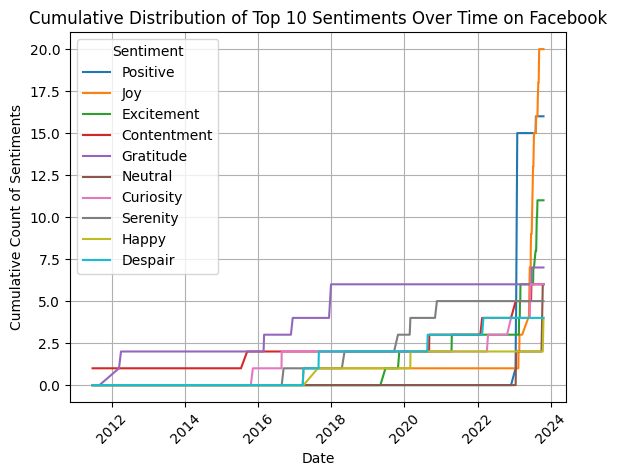

<Figure size 1000x600 with 0 Axes>

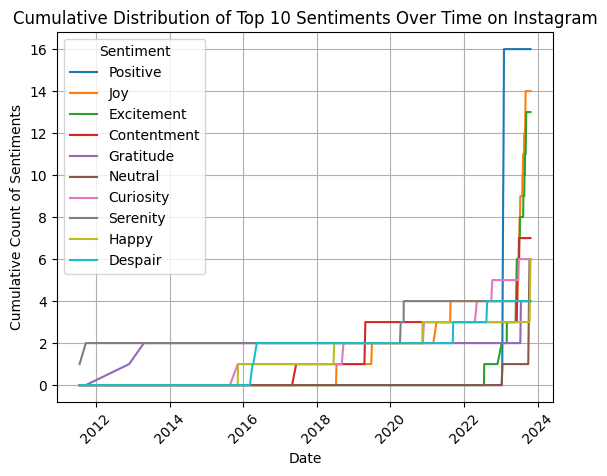

<Figure size 1000x600 with 0 Axes>

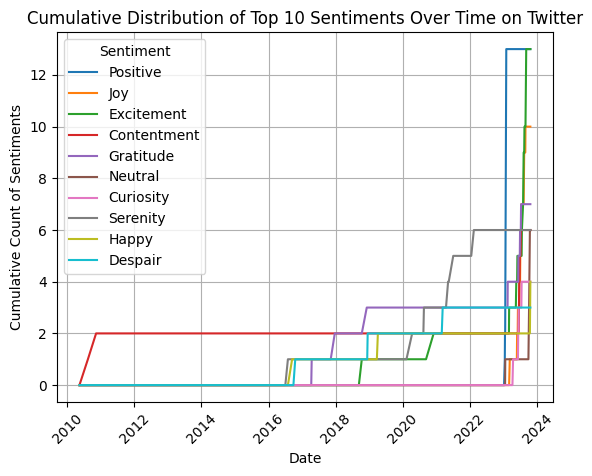

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la colonne Timestamp en format datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Grouper les données par plateforme, sentiment et date, puis compter les occurrences
platform_sentiment_counts = data.groupby([data['Platform'], data['Timestamp'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

# Sélectionner les 10 sentiments les plus fréquents globalement (toutes plateformes confondues)
top_10_sentiments = platform_sentiment_counts.sum().nlargest(10).index

# Filtrer les données pour ne garder que les 10 sentiments les plus importants
platform_sentiment_counts_top_10 = platform_sentiment_counts[top_10_sentiments]

# Calculer les sommes cumulées pour ces sentiments par plateforme
platform_sentiment_counts_top_10_cumulative = platform_sentiment_counts_top_10.groupby(level=0).cumsum()

# Tracer la distribution des 10 sentiments cumulés par plateforme
for platform in platform_sentiment_counts_top_10_cumulative.index.levels[0]:
    plt.figure(figsize=(10,6))
    platform_sentiment_counts_top_10_cumulative.loc[platform].plot(kind='line')
    plt.title(f'Cumulative Distribution of Top 10 Sentiments Over Time on {platform}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Count of Sentiments')
    plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
    plt.grid(True)
    plt.show()


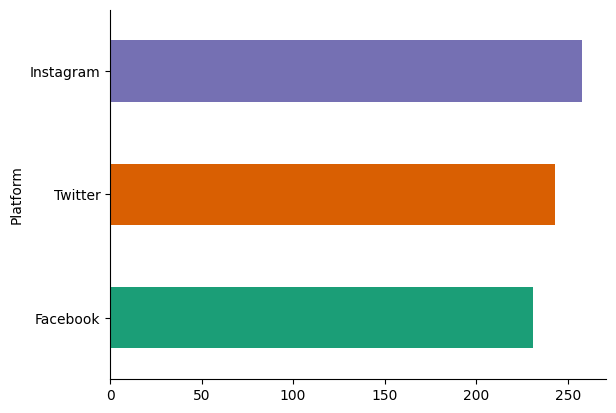

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Platform').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

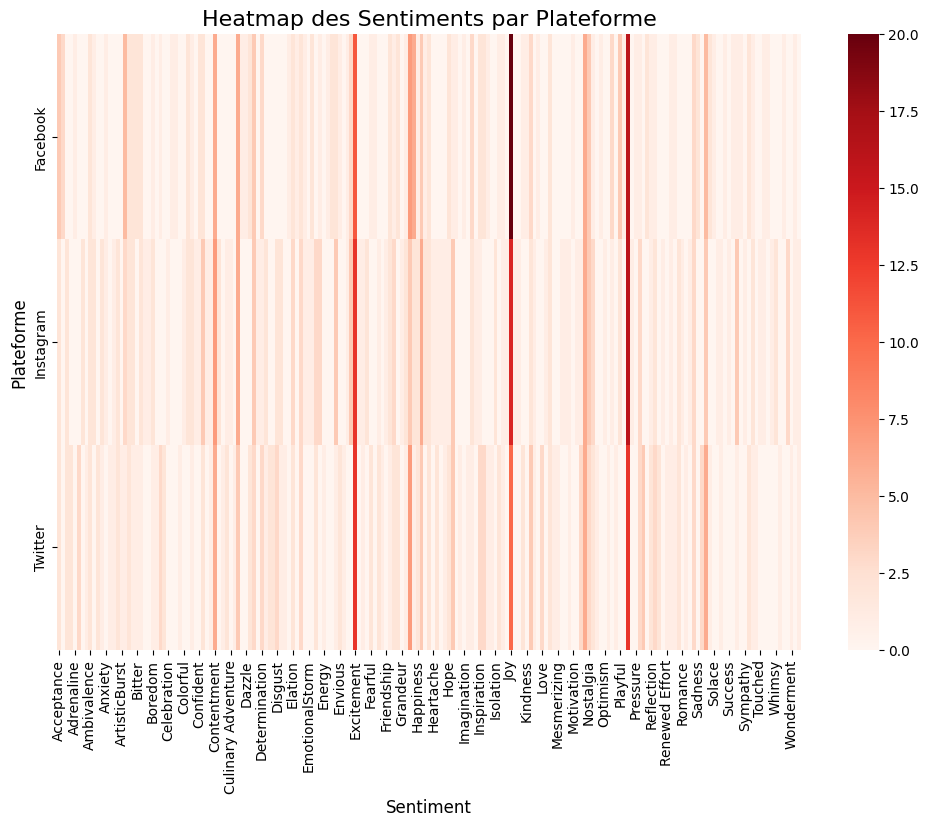

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper les données par plateforme et sentiment, puis compter les occurrences
platform_sentiment_counts = data.groupby(['Platform', 'Sentiment']).size().unstack(fill_value=0)

# Créer la heatmap avec une palette allant du clair au rouge foncé (Reds)
plt.figure(figsize=(12, 8))
sns.heatmap(platform_sentiment_counts, cmap='Reds', cbar=True, linewidths=0, linecolor='white')

# Ajuster les titres et labels
plt.title('Heatmap des Sentiments par Plateforme', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Plateforme', fontsize=12)

# Afficher la heatmap
plt.show()


In [71]:
import pandas as pd
from collections import Counter

# Fonction pour transformer les hashtags en liste
def process_hashtags(hashtags):
    if isinstance(hashtags, str):
        # Extraire les hashtags de la chaîne de caractères
        return [hashtag.strip() for hashtag in hashtags.split() if hashtag.startswith('#')]
    else:
        return []

# Appliquer le prétraitement sur la colonne 'Hashtags'
data['Hashtags'] = data['Hashtags'].apply(process_hashtags)

# Fonction pour obtenir le top 10 des hashtags uniques par plateforme
def top_hashtags_by_platform(df, platform_column, hashtags_column, top_n=10):
    result = {}
    
    # Groupement par plateforme
    platforms = df[platform_column].unique()
    
    for platform in platforms:
        # Filtrer les données par plateforme
        platform_data = df[df[platform_column] == platform]
        
        # Extraire tous les hashtags de cette plateforme
        all_hashtags = [hashtag for hashtags_list in platform_data[hashtags_column] for hashtag in hashtags_list]
        
        # Compter les occurrences des hashtags
        hashtag_counts = Counter(all_hashtags)
        
        # Obtenir les top N hashtags
        top_hashtags = hashtag_counts.most_common(top_n)
        
        # Stocker les résultats pour cette plateforme
        result[platform] = top_hashtags
    
    return result

# Obtenir le top 10 des hashtags par plateforme
top_hashtags = top_hashtags_by_platform(data, 'Platform', 'Hashtags', top_n=10)

# Afficher les résultats
for platform, hashtags in top_hashtags.items():
    print(f"Top 10 des hashtags pour {platform}:")
    for hashtag, count in hashtags:
        print(f"{hashtag}: {count}")
    print("\n")


Top 10 des hashtags pour Twitter:
#Serenity: 6
#Gratitude: 5
#Love: 4
#Excitement: 4
#Loneliness: 4
#Proud: 4
#Hopeful: 4
#Disgust: 3
#Calmness: 3
#Despair: 3


Top 10 des hashtags pour Instagram:
#Curiosity: 5
#Confusion: 4
#Euphoria: 4
#Enthusiasm: 4
#Serenity: 4
#Despair: 4
#Nostalgia: 4
#Hopeful: 4
#Joy: 4
#Surprise: 3


Top 10 des hashtags pour Facebook:
#Excitement: 6
#Gratitude: 6
#Grief: 6
#Awe: 5
#Contentment: 5
#Serenity: 5
#Acceptance: 4
#Despair: 4
#Nostalgia: 4
#Curiosity: 4




Il y a 670 utilisateurs uniques au total


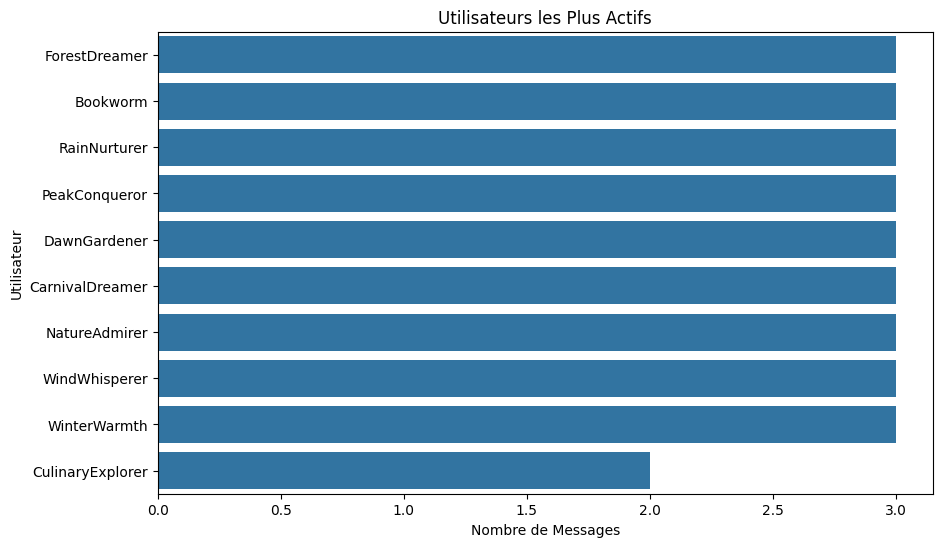

In [72]:
# Compter le nombre de messages par utilisateur
user_counts = data['User'].value_counts().sort_values(ascending=False).head(10).round(0)
print(f"Il y a {len(data['User'].unique())} utilisateurs uniques au total")
# Barplot des utilisateurs les plus actifs
plt.figure(figsize=(10, 6))
sns.barplot(x=user_counts.values, y=user_counts.index, orient='h')
plt.title('Utilisateurs les Plus Actifs')
plt.xlabel('Nombre de Messages')
plt.ylabel('Utilisateur')
plt.show()


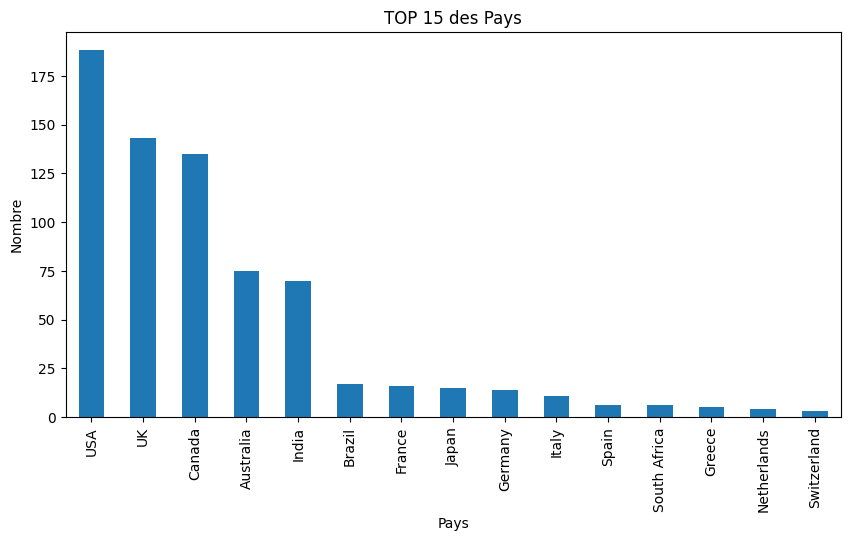

In [73]:
plt.figure(figsize=(10, 5))
data['Country'].value_counts().nlargest(15).plot(kind='bar')
plt.title('TOP 15 des Pays')
plt.xlabel('Pays')
plt.ylabel('Nombre')
plt.show()

# DATA PROCESSING : Pre-processing des données

## Lemmatisation des textes

In [87]:
# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Charger les stopwords en français (ajustez si vous utilisez une autre langue)
stop_words = set(stopwords.words('english'))

# Fonction de prétraitement du texte
def preprocess_text(text):
    # Convertir le texte en minuscules
    text = text.lower()
    
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenizer le texte
    tokens = word_tokenize(text)
    
    # Supprimer les stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatisation des tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoindre les tokens en une seule chaîne de caractères
    text = ' '.join(tokens)
    
    return text

# Appliquer le prétraitement au texte
data['Text'] = data['Text'].apply(preprocess_text)

# Encodage des sentiments en valeurs numériques
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sentiment_encode'] = label_encoder.fit_transform(data['Sentiment'])

# Afficher les premières lignes pour vérifier le prétraitement
print(data.head())

   Unnamed: 0.1  Unnamed: 0                              Text    Sentiment  \
0             0           0       enjoying beautiful day park   Positive     
1             1           1          traffic terrible morning   Negative     
2             2           2          finished amazing workout   Positive     
3             3           3  excited upcoming weekend getaway   Positive     
4             4           4  trying new recipe dinner tonight   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                   

# DATA SCIENCE : Construction et entrainement de modèle

### Entrainement d'un premier modèle avec l'ensemble des classes

In [75]:
#!pip install scikit-learn==1.5.1
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment_encode'], test_size=0.2, random_state=42)

# Convertir le texte en vecteurs TF-IDF
tfidf = TfidfVectorizer(
    ngram_range=(1,1),
    min_df=1,
    max_df= 0.95,
    max_features=5000
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Entraîner un modèle SVM pour la classification des sentiments
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

# Prédictions et rapport de classification
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

print("""
Il y a trop de classe qui sont sous représentées, 
le modèle est donc moins performant dessus, 
ce qui lui donne une performance globale plutôt faible
""")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          15       1.00      0.67      0.80         3
          16       0.00      0.00      0.00         0
          17       0.33      0.50      0.40         2
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         3
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       1.00    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [ ]:
print(f"""
Voici le nombre d'occurence par sentiment
{data['Sentiment'].value_counts()}
""")


Voici le nombre d'occurence par sentiment
Sentiment
Positive          45
Joy               44
Excitement        37
Contentment       19
Neutral           18
                  ..
LostLove           1
EmotionalStorm     1
Suffering          1
Bittersweet        1
Intrigue           1
Name: count, Length: 191, dtype: int64



### On recalifie par leur polarité les classes pour laisser que 3 sentiments : Neutre, négatif et positif

In [88]:
#!pip install textblob
from textblob import TextBlob

# Fonction pour classifier automatiquement le sentiment en positif, négatif ou neutre
def classify_sentiment(text):
    analysis = TextBlob(text)
    # Polarité : > 0 est positif, < 0 est négatif, sinon neutre
    if analysis.sentiment.polarity > 0:
        return 'positif'
    elif analysis.sentiment.polarity < 0:
        return 'négatif'
    else:
        return 'neutre'

# Appliquer cette classification sur votre colonne 'Text'
data['Sentiment_Category'] = data['Text'].apply(classify_sentiment)
print(data['Sentiment_Category'].value_counts())

data.to_csv('sentimentdata_corrige.csv', index=False)

Sentiment_Category
neutre     335
positif    288
négatif    109
Name: count, dtype: int64


In [ ]:
data[data['Sentiment_Category']=="positif"].head(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,time,Date,Time,Weekday,Sentiment_encode,Sentiment_Category
0,enjoying beautiful day park,Positive,2023-01-15 12:30:00,User123,Twitter,"[#Nature, #Park]",15.0,30.0,USA,2023,1,15,12,2023-01-15 12:30:00,2023-01-15,12:30:00,6,146,positif
2,finished amazing workout,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,"[#Fitness, #Workout]",20.0,40.0,USA,2023,1,15,15,2023-01-15 15:45:00,2023-01-15,15:45:00,6,146,positif
3,excited upcoming weekend getaway,Positive,2023-01-15 18:20:00,AdventureX,Facebook,"[#Travel, #Adventure]",8.0,15.0,UK,2023,1,15,18,2023-01-15 18:20:00,2023-01-15,18:20:00,6,146,positif
4,trying new recipe dinner tonight,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,"[#Cooking, #Food]",12.0,25.0,Australia,2023,1,15,19,2023-01-15 19:55:00,2023-01-15,19:55:00,6,135,positif
6,rainy day call cozy blanket hot cocoa,Positive,2023-01-16 14:45:00,RainyDays,Facebook,"[#RainyDays, #Cozy]",10.0,20.0,Canada,2023,1,16,14,2023-01-16 14:45:00,2023-01-16,14:45:00,0,146,positif


### Entrainement d'un second modèle à partir des 3 sentiments en équilibrant les classes

### Modèle SVM

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib
from joblib import dump

# Étape 1: Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment_Category'], 
                                                    test_size=0.2, random_state=42, stratify=data['Sentiment_Category'])

# Étape 2: Convertir le texte en vecteurs TF-IDF
tfidf = TfidfVectorizer(
    ngram_range=(1,1),
    min_df=1,
    max_df= 0.95,
    max_features=5000
)

#Enregistrement du Vectorizer
joblib.dump(tfidf, 'vectorizer')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Étape 3: Rééchantillonnage avec SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Étape 4: Entraîner un modèle SVM
model = LinearSVC(class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Étape 5: Prédictions et rapport de classification
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, zero_division=0))

cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}\n")



              precision    recall  f1-score   support

      neutre       0.66      0.75      0.70        67
     négatif       0.55      0.50      0.52        22
     positif       0.73      0.64      0.68        58

    accuracy                           0.67       147
   macro avg       0.64      0.63      0.63       147
weighted avg       0.67      0.67      0.66       147

Cross-Validation Scores: [0.83850932 0.825      0.80625    0.79375    0.85625   ]
Mean CV Score: 0.8239518633540373



### Autres modèles


Explications des Modèles et Hyperparamètres :

1. **Random Forest** :
   - **Principe** : Utilise plusieurs arbres de décision pour faire des prédictions. Chaque arbre vote pour une classe et la classe avec le plus de votes est choisie.
   - **Hyperparamètres** :
     - `n_estimators` : Nombre d'arbres dans la forêt (plus de fleurs peuvent améliorer la performance mais augmenter le temps de calcul).
     - `max_depth` : Profondeur maximale des arbres. Limiter la profondeur peut éviter le surapprentissage.

2. **Gradient Boosting** :
   - **Principe** : Combine plusieurs arbres de décision de manière séquentielle, chaque nouvel arbre corrigeant les erreurs des arbres précédents.
   - **Hyperparamètres** :
     - `n_estimators` : Nombre d'arbres. Augmenter peut améliorer les performances mais peut aussi entraîner un surapprentissage.
     - `learning_rate` : Taux d'apprentissage. Un taux plus bas nécessite plus d'arbres pour converger mais peut améliorer la généralisation.

3. **Logistic Regression** :
   - **Principe** : Modèle linéaire qui estime la probabilité que chaque échantillon appartienne à une classe.
   - **Hyperparamètres** :
     - `C` : Paramètre de régularisation. Une valeur élevée signifie moins de régularisation et peut entraîner un surapprentissage.
     - `solver` : Méthode d'optimisation (liblinear, newton-cg, lbfgs, etc.). Peut influencer la performance et la vitesse de convergence.

4. **Naive Bayes** :
   - **Principe** : Basé sur le théorème de Bayes, en supposant que les caractéristiques sont indépendantes entre elles.
   - **Hyperparamètres** :
     - Ce modèle a généralement moins d'hyperparamètres. `alpha` est le paramètre de lissage qui peut être ajusté pour éviter les zéros dans les probabilités.

5. **KNN (K-Nearest Neighbors)** :
   - **Principe** : Classifie un échantillon en fonction des classes des K plus proches voisins.
   - **Hyperparamètres** :
     - `n_neighbors` : Nombre de voisins à considérer. Augmenter peut rendre le modèle plus général, réduire peut le rendre plus sensible au bruit.
     - `p` : Paramètre pour la distance (1 pour la distance de Manhattan, 2 pour la distance euclidienne).

6. **Neural Network (MLP)** :
   - **Principe** : Utilise des couches de neurones pour apprendre des représentations complexes des données.
   - **Hyperparamètres** :
     - `hidden_layer_sizes` : Nombre et taille des couches cachées. Peut influencer la capacité d'apprentissage du modèle.
     - `activation` : Fonction d'activation (relu, tanh, logistic). Influence comment les neurones activent les entrées.
     - `solver` : Algorithme pour optimiser les poids du réseau (adam, sgd, lbfgs).


In [84]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from joblib import dump
import numpy as np


# Liste des modèles à tester
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=21),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, class_weight='balanced', random_state=42),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(),
    "Neural Network (MLP)": MLPClassifier(max_iter=300, random_state=42)
}

# Étape 4: Tester les modèles
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    
    # Entraîner le modèle
    model.fit(X_train_resampled, y_train_resampled)

    # Enregistrer le modèle dans un fichier .joblib
    model_filename ='modeles/' + model_name + '_model.joblib'
    dump(model, model_filename)
    
    # Prédictions
    y_pred = model.predict(X_test_tfidf)
    
    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Validation croisée pour obtenir une idée générale de la performance
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {np.mean(cv_scores)}\n")


--- Random Forest ---
              precision    recall  f1-score   support

      neutre       0.62      0.93      0.74        67
     négatif       0.80      0.36      0.50        22
     positif       0.92      0.59      0.72        58

    accuracy                           0.71       147
   macro avg       0.78      0.63      0.65       147
weighted avg       0.76      0.71      0.70       147

Cross-Validation Scores: [0.70186335 0.725      0.8125     0.825      0.925     ]
Mean CV Score: 0.7978726708074534

--- Gradient Boosting ---
              precision    recall  f1-score   support

      neutre       0.65      0.90      0.75        67
     négatif       0.62      0.45      0.53        22
     positif       0.90      0.60      0.72        58

    accuracy                           0.71       147
   macro avg       0.72      0.65      0.67       147
weighted avg       0.74      0.71      0.71       147

Cross-Validation Scores: [0.70807453 0.73125    0.775      0.79375    0.8

### Choix du  nombre d'arbres dans Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


# Plage des nombres d'arbres à tester
n_estimators_range = [10,15,20,21,22,23,24,25,30,35,40, 50, 100, 200, 500]

# Dictionnaire pour stocker les scores
cv_scores = {}
accuracy_scores = {}

for n in n_estimators_range:
    # Créer le modèle avec le nombre d'arbres spécifié
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Évaluer le modèle via validation croisée
    cv_scores[n] = np.mean(cross_val_score(model, X_train_resampled, y_train_resampled, cv=5))
    print(f"n_estimators={n}, Cross-Validation Score: {cv_scores[n]}")
    
    # Entraîner le modèle sur l'ensemble d'entraînement complet
    model.fit(X_train_resampled, y_train_resampled)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_tfidf)
    
    # Afficher le rapport de classification
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[n] = accuracy
    print(f"n_estimators={n}, Accuracy: {accuracy_scores[n]}")
    print(f"--- Classification Report for n_estimators={n} ---")
    print(classification_report(y_test, y_pred, zero_division=0))

# Trouver la meilleure valeur pour n_estimators
best_n_estimators = max(accurancy, key=cv_scores.get)
print(f"Meilleur nombre d'arbres : {best_n_estimators}")

# Trouver la meilleure accuracy
best_accuracy = max(accuracy_scores.values())
best_accuracy_n_estimators = max(accuracy_scores, key=accuracy_scores.get)
print(f"Meilleure accuracy: {best_accuracy} pour n_estimators={best_accuracy_n_estimators}")

n_estimators=10, Cross-Validation Score: 0.7803726708074533
n_estimators=10, Accuracy: 0.6938775510204082
--- Classification Report for n_estimators=10 ---
              precision    recall  f1-score   support

      neutre       0.62      0.96      0.75        67
     négatif       0.64      0.32      0.42        22
     positif       0.97      0.53      0.69        58

    accuracy                           0.69       147
   macro avg       0.74      0.60      0.62       147
weighted avg       0.76      0.69      0.68       147

n_estimators=15, Cross-Validation Score: 0.7953493788819875
n_estimators=15, Accuracy: 0.7006802721088435
--- Classification Report for n_estimators=15 ---
              precision    recall  f1-score   support

      neutre       0.61      0.93      0.74        67
     négatif       0.82      0.41      0.55        22
     positif       0.91      0.55      0.69        58

    accuracy                           0.70       147
   macro avg       0.78      0.63  

In [89]:
import matplotlib.pyplot as plt

# Tracer la courbe de performance
plt.plot(n_estimators_range, list(accuracy_scores.values()), marker='o')
plt.xlabel('Nombre d\'arbres (n_estimators)')
plt.ylabel('Accurancy')
plt.title('Performance en fonction du nombre d\'arbres')
plt.show()


NameError: name 'n_estimators_range' is not defined